# Lendo os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install git+https://github.com/CarlosChiarelli/funcoes-proprias.git
import funcoesProprias as fp

# visualizar NAs
from missingno import heatmap 

# sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# relatorio geral
from pandas_profiling import ProfileReport

In [2]:
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

print(treino.shape, teste.shape)

(13730, 167) (4576, 47)


In [3]:
np.sum([x == 'NU_NOTA_MT' for x in teste.columns])

0

O target não se encontra no treino.

In [4]:
colunas = treino.columns.tolist()
colunas.remove('NU_NOTA_MT')

In [5]:
colunas = treino.columns.tolist()
colunas.remove('NU_NOTA_MT')
col_y = 'NU_NOTA_MT'

x = treino[colunas]
y = treino['NU_NOTA_MT']

In [6]:
x.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [7]:
cols_finais = teste.columns
x = x[cols_finais]

In [8]:
x.shape, teste.shape

((13730, 47), (4576, 47))

In [9]:
treino = pd.concat([x, y], axis=1)
treino.shape

(13730, 48)

In [10]:
treino.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,D,D,C,A,A,A,NaN,A,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,H,E,E,C,B,C,F,D,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,E,D,C,A,A,B,F,A,NaN


# Relatório geral

In [11]:
#relatorio = ProfileReport(treino, title='Relatório geral de perfil')

In [12]:
#relatorio.to_notebook_iframe()

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\funcoesProprias\visualizacao.py:79: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


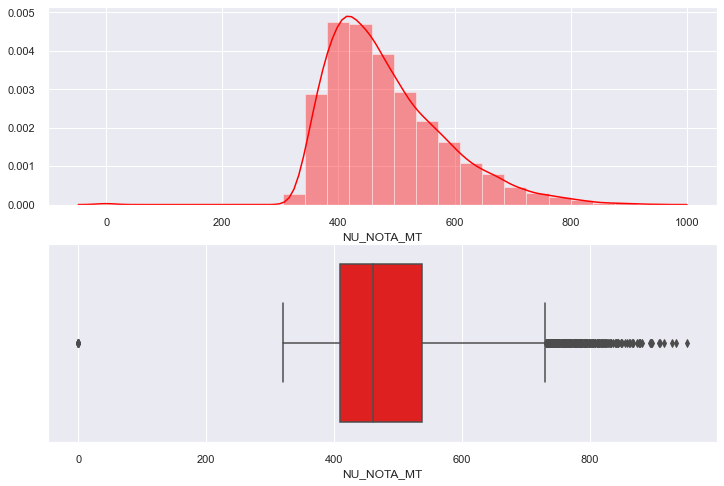

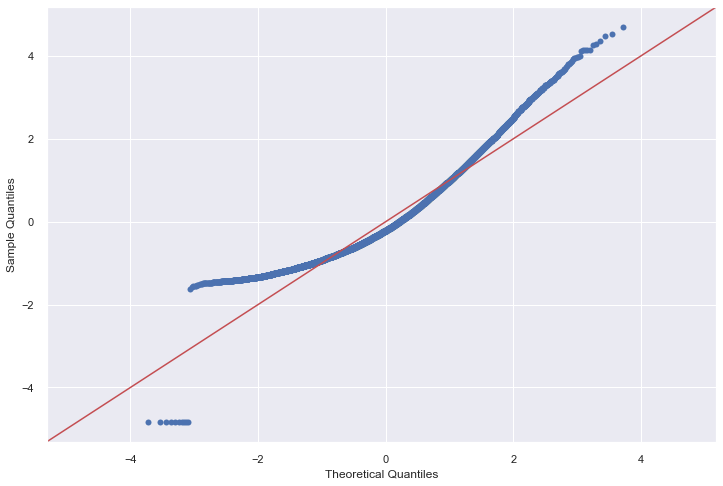

In [13]:
# visualizando target
fp.plotaDistribuicaoUniVar(treino['NU_NOTA_MT'].dropna())

In [14]:
exploracao = fp.dfExploracao(treino)
exploracao.head()

,colunas,tipos,na_perct,quantUnicos
0,NU_INSCRICAO,object,0.0,13730
1,CO_UF_RESIDENCIA,int64,0.0,27
2,SG_UF_RESIDENCIA,object,0.0,27
3,NU_IDADE,int64,0.0,55
4,TP_SEXO,object,0.0,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B223523548>]],
      dtype=object)

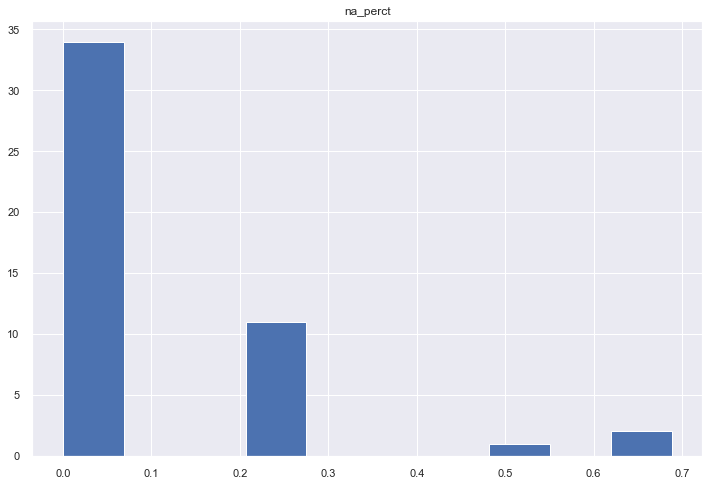

In [15]:
exploracao.hist('na_perct')

In [16]:
filtro = (exploracao['na_perct'] > .5) | (exploracao['colunas'] == 'NU_NOTA_MT')
exploracao[filtro].sort_values('na_perct', ascending=False)

,colunas,tipos,na_perct,quantUnicos
10,TP_ENSINO,float64,0.688128,3
12,TP_DEPENDENCIA_ADM_ESC,float64,0.688128,4
45,Q027,object,0.536999,13
47,NU_NOTA_MT,float64,0.261981,3406


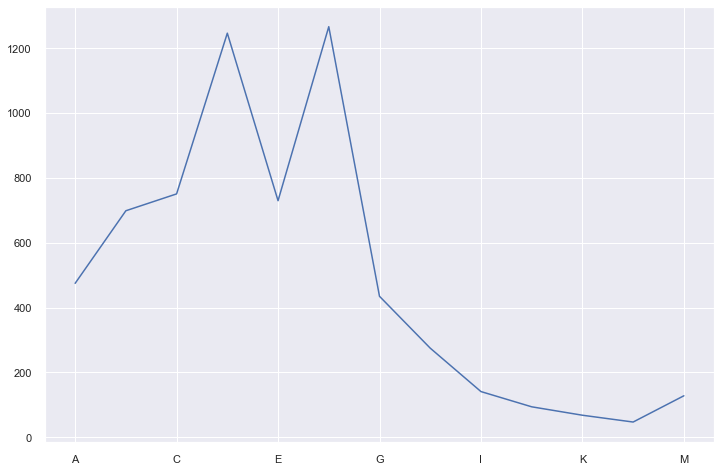

In [17]:
treino['Q027'].value_counts().sort_index().plot()

In [18]:
aux = treino.copy()
aux['Q027'] = aux['Q027'].fillna('0A')

rotulador = LabelEncoder()

q027_proc = rotulador.fit_transform(aux['Q027'])

aux = pd.concat([aux['Q027'], pd.DataFrame(q027_proc, columns=['proc'])], axis=1)
aux.head()

,Q027,proc
0,H,8
1,0A,0
2,0A,0
3,F,6
4,F,6


In [19]:
aux['Q027'].value_counts().sort_index()

0A    7373
A      475
B      699
C      751
D     1247
E      730
F     1267
G      435
H      275
I      141
J       94
K       68
L       47
M      128
Name: Q027, dtype: int64

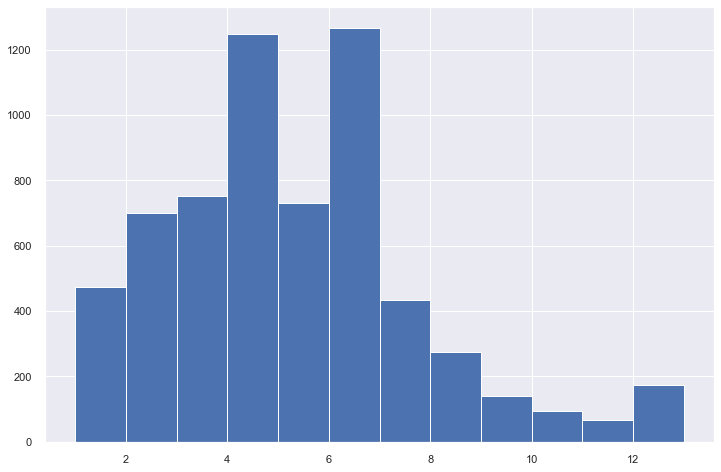

In [20]:
aux['proc'][aux['proc'] != 0].hist(bins=12)

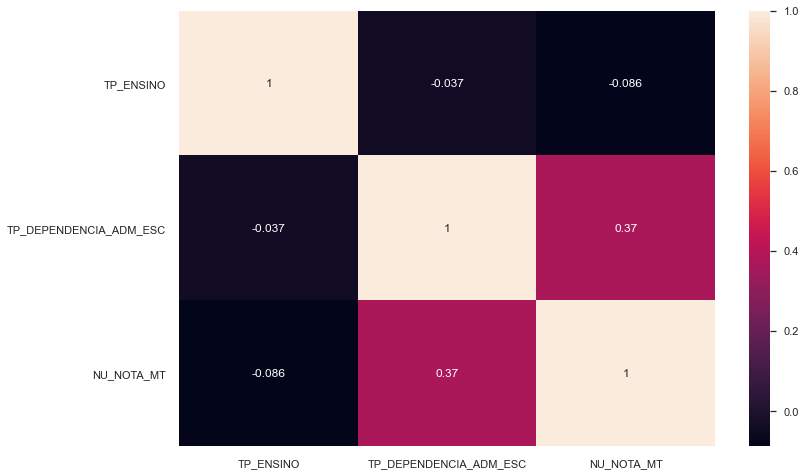

In [21]:
sns.heatmap(treino[exploracao[filtro]['colunas']].corr(), annot=True)

In [22]:
treino['TP_ENSINO'].value_counts()

1.0    3886
3.0     370
2.0      26
Name: TP_ENSINO, dtype: int64

# Pré-processamento

# Remoção de variáveis: completude e significado

As variáveis que possuirem mais de 50% missings serão descartadas.


É necessário remover também os IDs dos candidatos.


Outra removida será as colunas "CO_" que dizem qual o código da prova. Pelo contexto do problema, o código especifica a ordem das questões e coisas pouco ligadas a nota de matemática. Além de possui vários tipos, gerando várias colunas como dummy.


Informação do estado também serão retiradas, devido ser uma coluna dummy que geraria 27 novas.


Removeremos também as variáveis que começam com 'IN_' por ãpresentarem baixa variação.

In [23]:
cols_rm = exploracao[exploracao['na_perct'] > .5]['colunas']
cols_rm

10                 TP_ENSINO
12    TP_DEPENDENCIA_ADM_ESC
45                      Q027
Name: colunas, dtype: object

In [24]:
# removendo cols NAs
treino.drop(cols_rm, axis=1, inplace=True)
teste.drop(cols_rm, axis=1, inplace=True)

In [25]:
teste.shape

(4576, 44)

In [26]:
id_teste = teste['NU_INSCRICAO']

# removendo col ID
treino.drop('NU_INSCRICAO', axis=1, inplace=True)
teste.drop('NU_INSCRICAO', axis=1, inplace=True)

In [27]:
exploracao = fp.dfExploracao(treino)
exploracao.head()

,colunas,tipos,na_perct,quantUnicos
0,CO_UF_RESIDENCIA,int64,0.0,27
1,SG_UF_RESIDENCIA,object,0.0,27
2,NU_IDADE,int64,0.0,55
3,TP_SEXO,object,0.0,2
4,TP_COR_RACA,int64,0.0,6


In [28]:
exploracao.sort_values(['tipos','quantUnicos'])

,colunas,tipos,na_perct,quantUnicos
11,IN_CEGUEIRA,int64,0.000000,1
9,IN_TREINEIRO,int64,0.000000,2
10,IN_BAIXA_VISAO,int64,0.000000,2
12,IN_SURDEZ,int64,0.000000,2
13,IN_DISLEXIA,int64,0.000000,2
14,IN_DISCALCULIA,int64,0.000000,2
15,IN_SABATISTA,int64,0.000000,2
16,IN_GESTANTE,int64,0.000000,2
17,IN_IDOSO,int64,0.000000,2
28,TP_LINGUA,int64,0.000000,2


In [29]:
treino['CO_PROVA_CH'].unique()

array(['9cd70f1b922e02bd33453b3f607f5a644fb9b1b8',
       '909237ab0d84688e10c0470e2997348aff585273',
       '2d22ac1d42e6187f09ee6c578df187a760123ccf',
       'f48d390ab6a2428e659c37fb8a9d00afde621889',
       '942ab3dc020af4cf53740b6b07e9dd7060b24164',
       'f94e97c2a5689edd5369740fde9a927e23a9465f',
       '0fb4772fc6ee9b951ade2fbe6699cc37985c422e',
       'c95541bf218d7ff70572ca4bcb421edeff05c6d5',
       '6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93',
       'd5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee'], dtype=object)

In [30]:
# colunas CO_ (código prova) e relacionadas aos estados
cols_rm = treino.columns[[True if x.startswith('CO_') or x.startswith('SG') else False for x in treino.columns]]

treino.drop(cols_rm, axis=1, inplace=True)
teste.drop(cols_rm, axis=1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B222EFBC88>,
      dtype=object)

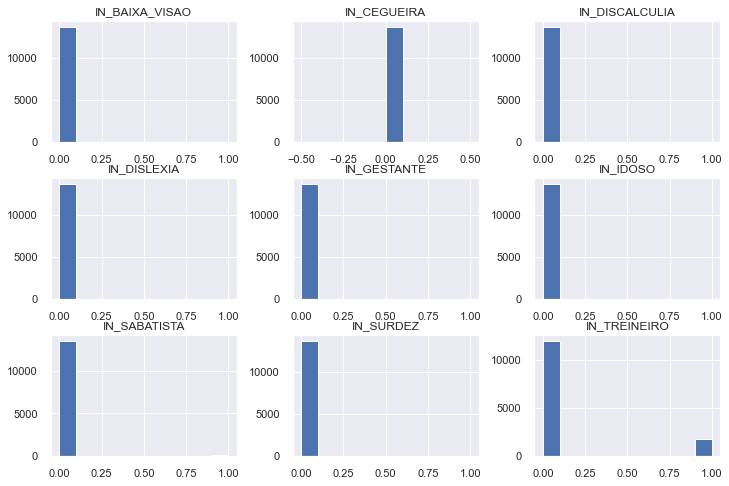

In [31]:
cols_in = treino.columns[[True if x.startswith('IN_') else False for x in treino.columns]]
treino[cols_in].hist()

In [32]:
# rm cols que começam com IN
treino.drop(cols_in, axis=1, inplace=True)
teste.drop(cols_in, axis=1, inplace=True)

In [33]:
treino.shape, teste.shape

((13730, 29), (4576, 28))

In [34]:
exploracao = fp.dfExploracao(treino)
exploracao.sort_values(['tipos','quantUnicos'])

,colunas,tipos,na_perct,quantUnicos
13,TP_LINGUA,int64,0.000000,2
7,TP_PRESENCA_CN,int64,0.000000,3
8,TP_PRESENCA_CH,int64,0.000000,3
9,TP_PRESENCA_LC,int64,0.000000,3
4,TP_ST_CONCLUSAO,int64,0.000000,4
6,TP_ESCOLA,int64,0.000000,4
3,TP_NACIONALIDADE,int64,0.000000,5
2,TP_COR_RACA,int64,0.000000,6
5,TP_ANO_CONCLUIU,int64,0.000000,11
0,NU_IDADE,int64,0.000000,55


Devemos analisar as variáveis inteiras (int64). Algumas delas são dummies sendo que outras podem ser deixadas como categóricas ordinais.

In [35]:
cols_int = exploracao[exploracao['tipos'] == 'int64']['colunas']

for col in cols_int.tolist():
    print(col)
    print(treino[col].unique())
    print()

NU_IDADE
[24 17 21 25 28 18 16 29 27 19 20 30 22 15 40 23 37 32 38 26 42 44 34 48
 31 52 43 36 45 39 57 33 49 35 47 46 14 51 59 56 50 41 65 55 54 53 62 63
 67 61 60 64 58 66 13]

TP_COR_RACA
[1 3 0 2 4 5]

TP_NACIONALIDADE
[1 2 3 4 0]

TP_ST_CONCLUSAO
[1 2 3 4]

TP_ANO_CONCLUIU
[ 4  0  9  1  8  7  2  6 10  5  3]

TP_ESCOLA
[1 2 3 4]

TP_PRESENCA_CN
[1 0 2]

TP_PRESENCA_CH
[1 0 2]

TP_PRESENCA_LC
[1 0 2]

TP_LINGUA
[1 0]



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B223886308>,
      dtype=object)

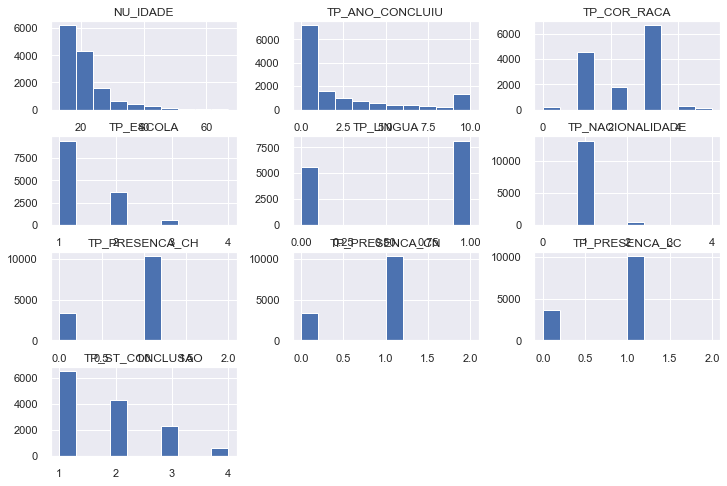

In [36]:
treino[cols_int].hist()

Nacionalidae e a presença nas provas serão arrancadas. A presença pelo fato de estar diretamente ligada aos NANs que aparecem nas notas.

In [37]:
aux = treino.copy()

cols_presenca = [True if 'PRESENCA' in x else False for x in treino.columns]
cols_presenca = treino.columns[cols_presenca]

# retorna NAN se não foi presente na prova
def presenteProva(x):
    if x == 1:
        return x
    else:
        return np.nan

# aplicando nas colunas de presença
for col in cols_presenca:
    aux[col] = aux[col].apply(presenteProva)

In [38]:
cols_notas = [True if ('NU_NOTA' in x) and ('COMP' not in x) or ('PRESENCA' in x) else False for x in treino.columns]
cols_notas = treino.columns[cols_notas]

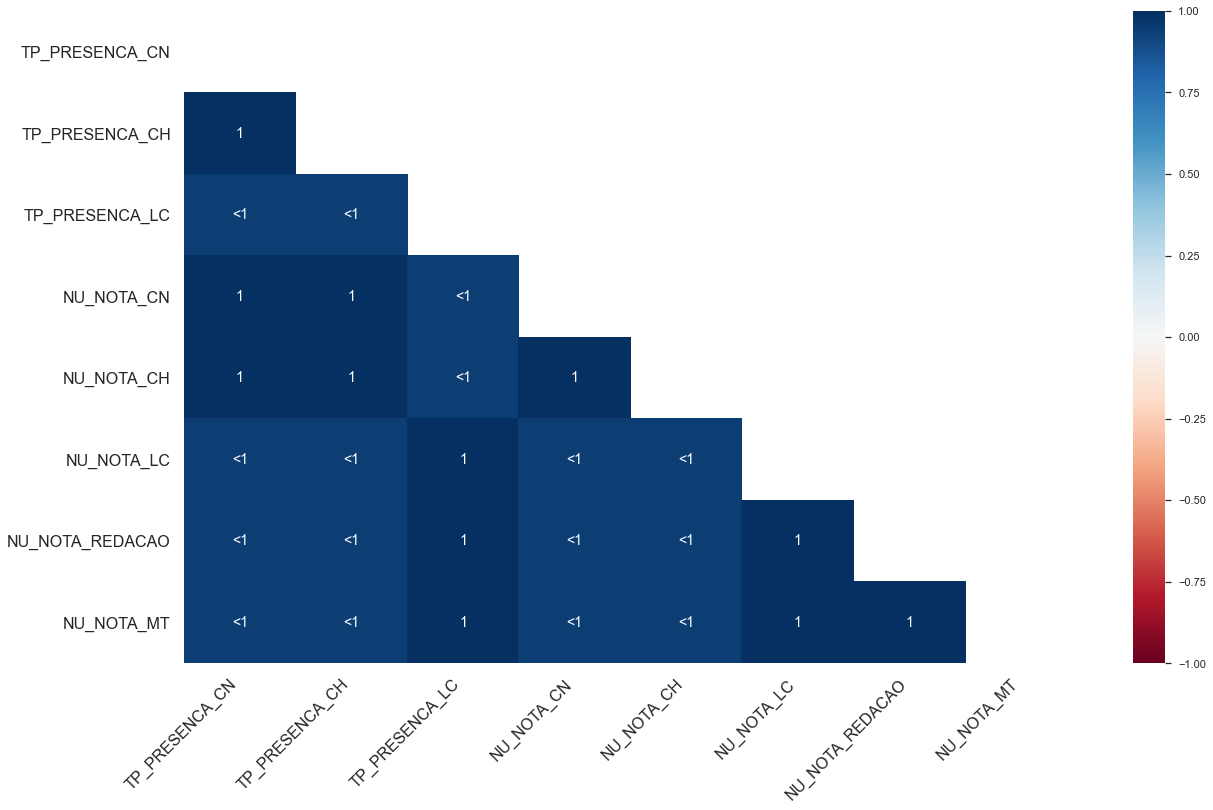

In [39]:
heatmap(aux[cols_notas])

In [40]:
cols_presenca

Index(['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC'], dtype='object')

In [41]:
cols_rm = cols_presenca.tolist()
cols_rm.append('TP_NACIONALIDADE')
cols_rm

['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_NACIONALIDADE']

In [42]:
# removendo cols NAs
treino.drop(cols_rm, axis=1, inplace=True)
teste.drop(cols_rm, axis=1, inplace=True)

In [43]:
treino.shape

(13730, 25)

In [44]:
exploracao = fp.dfExploracao(treino)
exploracao.sort_values(['tipos','quantUnicos'])

,colunas,tipos,na_perct,quantUnicos
9,TP_LINGUA,int64,0.000000,2
3,TP_ST_CONCLUSAO,int64,0.000000,4
5,TP_ESCOLA,int64,0.000000,4
2,TP_COR_RACA,int64,0.000000,6
4,TP_ANO_CONCLUIU,int64,0.000000,11
0,NU_IDADE,int64,0.000000,55
10,TP_STATUS_REDACAO,float64,0.261981,9
13,NU_NOTA_COMP3,float64,0.261981,12
12,NU_NOTA_COMP2,float64,0.261981,13
14,NU_NOTA_COMP4,float64,0.261981,14


In [45]:
treino['TP_ESCOLA'].value_counts()

1    9447
2    3713
3     569
4       1
Name: TP_ESCOLA, dtype: int64

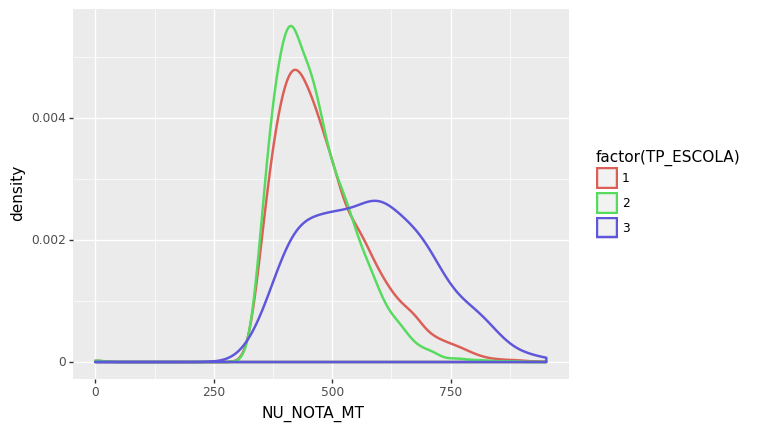

<ggplot: (-9223371920312103692)>

In [46]:
from plotnine import ggplot, aes, geom_density

aux = treino.copy()
aux['TP_ESCOLA'] = [3 if x == 4 else x for x in aux['TP_ESCOLA']]

(ggplot(aux.dropna(), aes('NU_NOTA_MT', color='factor(TP_ESCOLA)'))
 + geom_density(size=1)
)

Vemos que os que não disseram o tipo da escola (tipo 1), devem ser enquadrados como escola publica (tipo 2). Existe uma caso de tipo 4 (exterior), em que será colocado com tipo 3 (privada).

In [47]:
def corrigeTipoEscola(x):
    if x == 1 or x == 2:
        return 0
    else:
        return 1

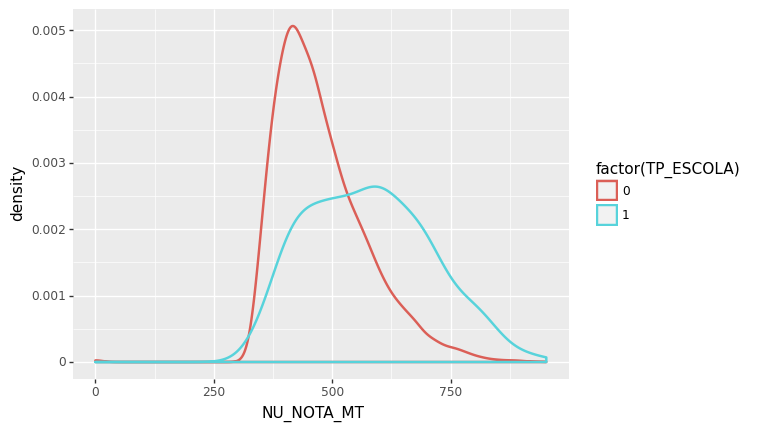

<ggplot: (-9223371920312012728)>

In [48]:
# corrigindo
treino['TP_ESCOLA'] = treino['TP_ESCOLA'].apply(corrigeTipoEscola)
teste['TP_ESCOLA'] = teste['TP_ESCOLA'].apply(corrigeTipoEscola)

(ggplot(treino.dropna(), aes('NU_NOTA_MT', color='factor(TP_ESCOLA)'))
 + geom_density(size=1)
)

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 80'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


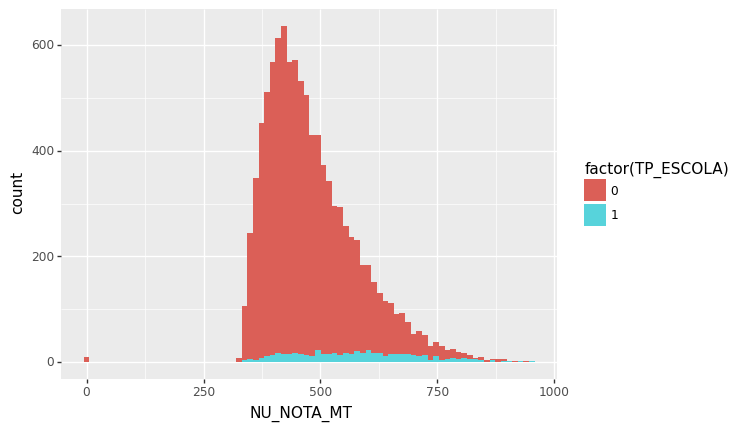

<ggplot: (-9223371920312004632)>

In [49]:
from plotnine import geom_histogram

(ggplot(treino.dropna(), aes('NU_NOTA_MT', fill='factor(TP_ESCOLA)'))
 + geom_histogram()
)

In [50]:
treino['TP_ESCOLA'].value_counts()

0    13160
1      570
Name: TP_ESCOLA, dtype: int64

In [51]:
exploracao = fp.dfExploracao(treino)
exploracao.sort_values('tipos').head(8)

,colunas,tipos,na_perct,quantUnicos
0,NU_IDADE,int64,0.000000,55
2,TP_COR_RACA,int64,0.000000,6
3,TP_ST_CONCLUSAO,int64,0.000000,4
4,TP_ANO_CONCLUIU,int64,0.000000,11
5,TP_ESCOLA,int64,0.000000,2
9,TP_LINGUA,int64,0.000000,2
16,NU_NOTA_REDACAO,float64,0.261981,53
15,NU_NOTA_COMP5,float64,0.261981,14


As colunas Q025 e TP_SEXO estão como caracteres, é necessário binariza-las. Os valores A (Q025) e M (Sexo - Homem) serão 0.

In [52]:
aux = treino[['Q025','TP_SEXO']]

for x in aux.columns:
    print(aux[x].unique())
    print

['A' 'B']
['M' 'F']


In [53]:
def corrige_q025(x):
    if x == 'A':
        return 0
    else:
        return 1

def corrige_sexo(x):
    if x == 'M':
        return 0
    else:
        return 1
    
def binarizaExecoes(df):
        
    df['Q025'] = df['Q025'].apply(corrige_q025)
    df['TP_SEXO'] = df['TP_SEXO'].apply(corrige_sexo)
    
    return df

In [54]:
treino = binarizaExecoes(treino)
teste = binarizaExecoes(teste)

In [55]:
aux = treino[['Q025','TP_SEXO']]

for x in aux.columns:
    print(aux[x].unique())
    print

[0 1]
[0 1]


In [56]:
exploracao = fp.dfExploracao(treino)
exploracao.sort_values(['tipos','quantUnicos'])

,colunas,tipos,na_perct,quantUnicos
1,TP_SEXO,int64,0.000000,2
5,TP_ESCOLA,int64,0.000000,2
9,TP_LINGUA,int64,0.000000,2
21,Q025,int64,0.000000,2
3,TP_ST_CONCLUSAO,int64,0.000000,4
2,TP_COR_RACA,int64,0.000000,6
4,TP_ANO_CONCLUIU,int64,0.000000,11
0,NU_IDADE,int64,0.000000,55
10,TP_STATUS_REDACAO,float64,0.261981,9
13,NU_NOTA_COMP3,float64,0.261981,12


In [57]:
treino['TP_ANO_CONCLUIU'].value_counts()

0     7206
1     1578
10    1167
2     1033
3      712
4      563
6      383
5      379
7      294
8      221
9      194
Name: TP_ANO_CONCLUIU, dtype: int64

Vemos que existem muitos tipos de ano de conclusão. Iremos discretia-los em intervalos menores.

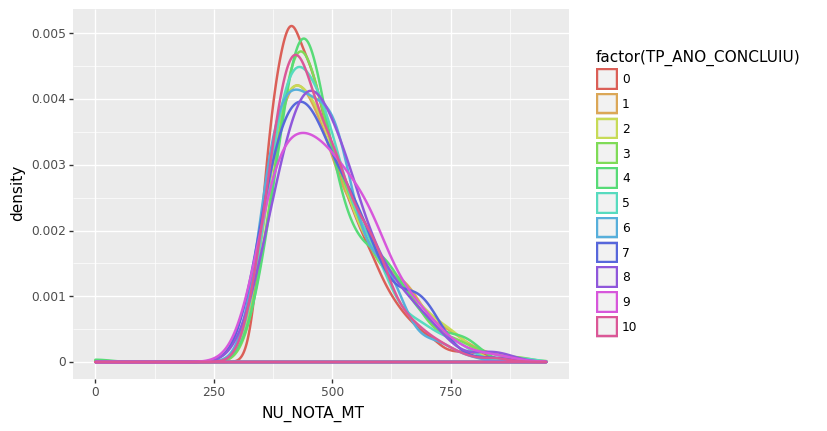

<ggplot: (-9223371920311840144)>

In [58]:
(ggplot(treino.dropna(), aes('NU_NOTA_MT', color='factor(TP_ANO_CONCLUIU)'))
 + geom_density(size=1)
)

In [59]:
treino['TP_ANO_CONCLUIU'].nunique()

11

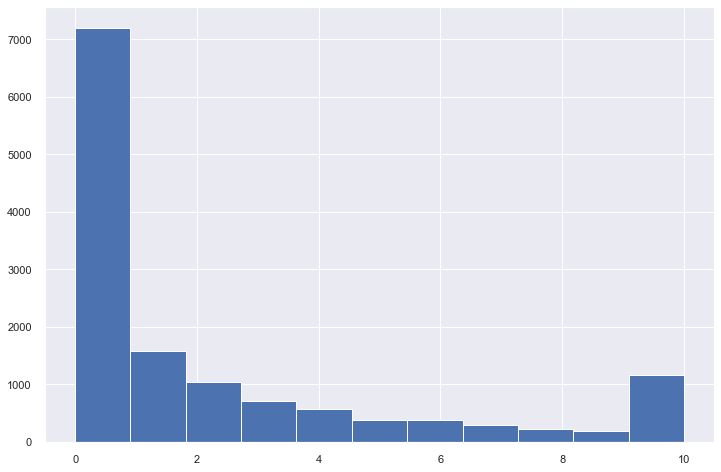

In [60]:
treino['TP_ANO_CONCLUIU'].hist(bins = 11)

In [61]:
def categ_anoConclusao(x):
    # nao respodeu
    if x == 0:
        return 1
    # 2012 <= x <= 2015
    elif x >= 1 and x <= 4:
        return 2
    # 2012 > x
    else:
        return 3

treino['TP_ANO_CONCLUIU'] = treino['TP_ANO_CONCLUIU'].apply(categ_anoConclusao)
teste['TP_ANO_CONCLUIU'] = teste['TP_ANO_CONCLUIU'].apply(categ_anoConclusao)

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_density : Removed 3597 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


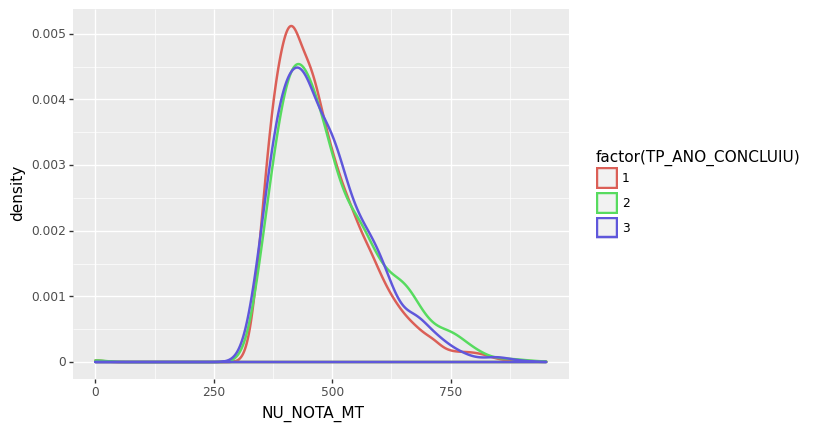

<ggplot: (-9223371920319369796)>

In [62]:
(ggplot(treino, aes('NU_NOTA_MT', color='factor(TP_ANO_CONCLUIU)'))
 + geom_density(size=1)
)

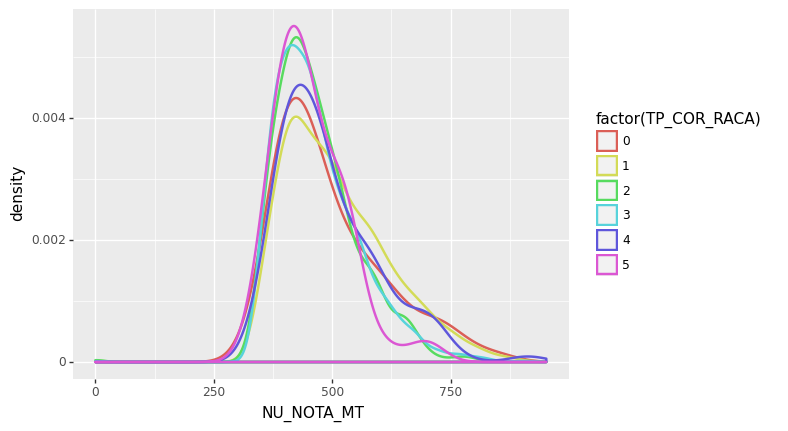

<ggplot: (-9223371920319367264)>

In [63]:
(ggplot(treino.dropna(), aes('NU_NOTA_MT', color='factor(TP_COR_RACA)'))
 + geom_density(size=1)
)

Acima vemos que branco, amarelo e não declaro possuem distribuições parecida para a NT_MAT, então iremos binarizar a variável Raça. 0 para branco (1), amarelo (4) e não declaro (0).

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_density : Removed 3597 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


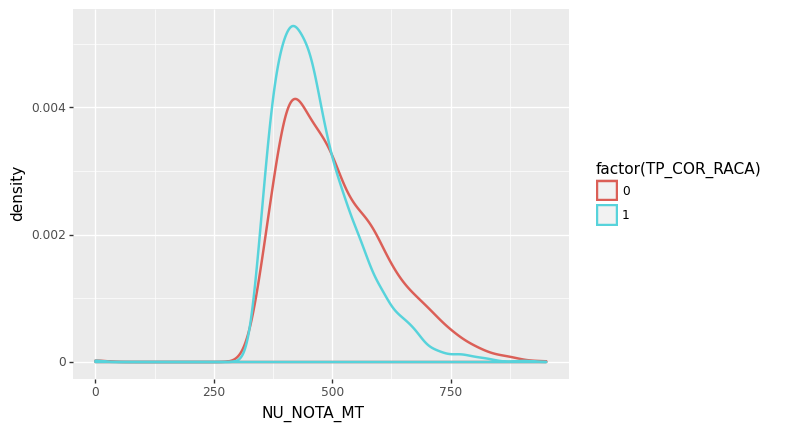

<ggplot: (-9223371920319169716)>

In [64]:
def raca_bin(x):
    if x == 1 or x == 4 or x == 0 or x == 6:
        return 0
    else:
        return 1
    
aux = treino.copy()
aux['TP_COR_RACA'] = aux['TP_COR_RACA'].apply(raca_bin) 

(ggplot(aux, aes('NU_NOTA_MT', color='factor(TP_COR_RACA)'))
 + geom_density(size=1)
)

In [65]:
treino['TP_COR_RACA'] = treino['TP_COR_RACA'].apply(raca_bin) 
teste['TP_COR_RACA'] = teste['TP_COR_RACA'].apply(raca_bin) 

In [66]:
exploracao = fp.dfExploracao(treino)
exploracao.sort_values(['tipos','quantUnicos'])

,colunas,tipos,na_perct,quantUnicos
1,TP_SEXO,int64,0.000000,2
2,TP_COR_RACA,int64,0.000000,2
5,TP_ESCOLA,int64,0.000000,2
9,TP_LINGUA,int64,0.000000,2
21,Q025,int64,0.000000,2
4,TP_ANO_CONCLUIU,int64,0.000000,3
3,TP_ST_CONCLUSAO,int64,0.000000,4
0,NU_IDADE,int64,0.000000,55
10,TP_STATUS_REDACAO,float64,0.261981,9
13,NU_NOTA_COMP3,float64,0.261981,12


As colunas "Q" estão como caracteres, mas sabemos que são categóricas ordinais com as respectiva ordem já pela própria ordem alfabética.


Faremos essa codificação.

In [67]:
cols_rotular = exploracao[exploracao['tipos'] == 'object']['colunas'].tolist()
cols_rotular

['Q001', 'Q002', 'Q006', 'Q024', 'Q026', 'Q047']

In [68]:
rotulador = LabelEncoder()

for col_alvo in cols_rotular:
    
    print(teste[col_alvo].value_counts())
    
    treino[col_alvo] = rotulador.fit_transform(treino[col_alvo])
    teste[col_alvo] = rotulador.transform(teste[col_alvo])
    
    print(teste[col_alvo].value_counts())


B    1138
E     988
C     694
D     594
H     537
A     273
F     239
G     113
Name: Q001, dtype: int64
1    1138
4     988
2     694
3     594
7     537
0     273
5     239
6     113
Name: Q001, dtype: int64
E    1302
B     869
C     762
D     674
F     307
H     240
A     214
G     208
Name: Q002, dtype: int64
4    1302
1     869
2     762
3     674
5     307
7     240
0     214
6     208
Name: Q002, dtype: int64
B    1449
C    1196
D     510
E     343
G     235
F     223
A     187
H     115
I      96
J      65
K      30
O      25
N      25
L      24
Q      21
M      17
P      15
Name: Q006, dtype: int64
1     1449
2     1196
3      510
4      343
6      235
5      223
0      187
7      115
8       96
9       65
10      30
13      25
14      25
11      24
16      21
12      17
15      15
Name: Q006, dtype: int64
B    2144
A    2047
C     283
D      78
E      24
Name: Q024, dtype: int64
1    2144
0    2047
2     283
3      78
4      24
Name: Q024, dtype: int64
A    2440
B    1164
C  

In [69]:
exploracao = fp.dfExploracao(teste)
exploracao.sort_values(['tipos','quantUnicos'])

,colunas,tipos,na_perct,quantUnicos
22,Q026,int32,0.000000,3
20,Q024,int32,0.000000,5
23,Q047,int32,0.000000,5
17,Q001,int32,0.000000,8
18,Q002,int32,0.000000,8
19,Q006,int32,0.000000,17
1,TP_SEXO,int64,0.000000,2
2,TP_COR_RACA,int64,0.000000,2
5,TP_ESCOLA,int64,0.000000,2
9,TP_LINGUA,int64,0.000000,2


In [70]:
fp.dfExploracao(teste)['tipos'].value_counts(), fp.dfExploracao(treino)['tipos'].value_counts()

(float64    10
 int64       8
 int32       6
 Name: tipos, dtype: int64,
 float64    11
 int64       8
 int32       6
 Name: tipos, dtype: int64)

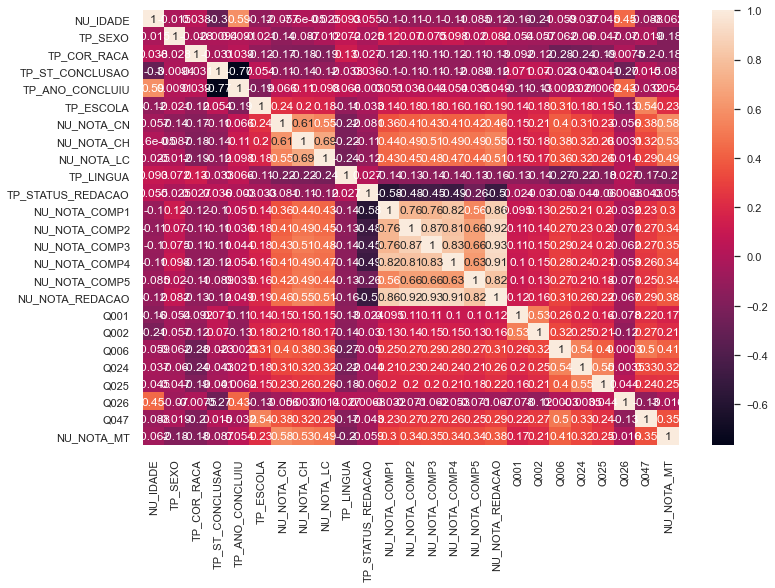

In [71]:
# visualizando novamente matriz correlacao
sns.heatmap(treino.dropna().corr(), annot=True)

In [72]:
treino.dropna().corr()['NU_NOTA_MT']

NU_IDADE            -0.062208
TP_SEXO             -0.183288
TP_COR_RACA         -0.183248
TP_ST_CONCLUSAO     -0.087215
TP_ANO_CONCLUIU      0.054194
TP_ESCOLA            0.226370
NU_NOTA_CN           0.584941
NU_NOTA_CH           0.529594
NU_NOTA_LC           0.492031
TP_LINGUA           -0.202141
TP_STATUS_REDACAO   -0.058638
NU_NOTA_COMP1        0.299811
NU_NOTA_COMP2        0.335441
NU_NOTA_COMP3        0.350556
NU_NOTA_COMP4        0.342629
NU_NOTA_COMP5        0.343998
NU_NOTA_REDACAO      0.379891
Q001                 0.169423
Q002                 0.211550
Q006                 0.410169
Q024                 0.323617
Q025                 0.248010
Q026                -0.015886
Q047                 0.351553
NU_NOTA_MT           1.000000
Name: NU_NOTA_MT, dtype: float64

# Redução de dimensionalidade


Agora que os dados estão de uma maneira "entendível" para os modelos, podemos fazer uma redução de dimensionalidade para visualiza-los.

In [73]:
aux = treino.dropna()
X = aux.drop('NU_NOTA_MT', axis=1)
y = aux['NU_NOTA_MT']

pca = PCA(n_components=2)

projecao = pca.fit_transform(X)

In [74]:
projecao.shape

(10097, 2)

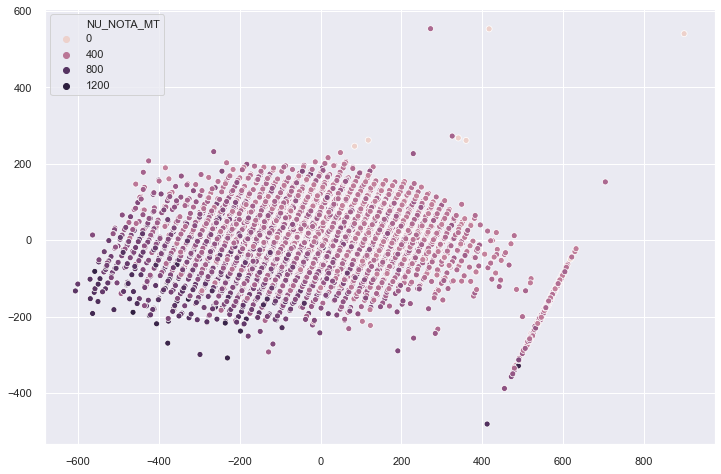

In [75]:
sns.scatterplot(x = projecao[:, 0], y = projecao[:, 1], hue = y)

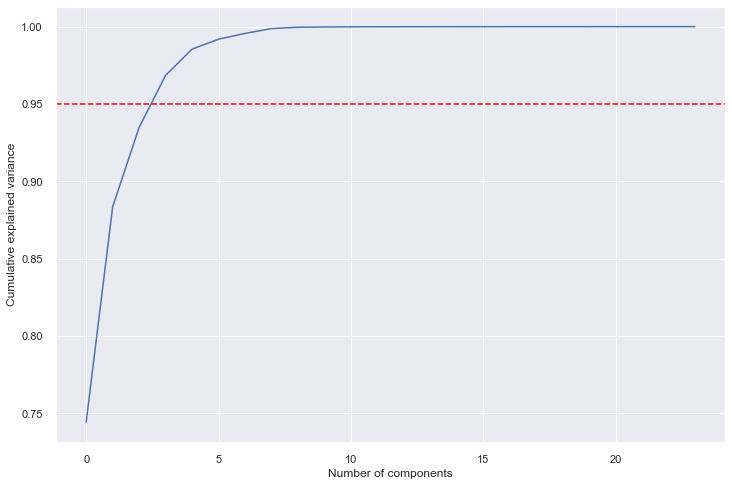

In [76]:
pca = PCA().fit(X)
variancia_explicada = pca.explained_variance_ratio_

g = sns.lineplot(np.arange(len(variancia_explicada)), np.cumsum(variancia_explicada))
g.axes.axhline(0.95, ls="--", color="red")
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

Acima 9 componentes da PCA retém praticamente 100% da variância explicada.

In [77]:
# 3 componentes apenas
pca = PCA(n_components=3)
projecao = pca.fit_transform(X)

In [78]:
plot3D = pd.DataFrame(data={'x':projecao[:,0],
                           'y':projecao[:,1],
                           'z':projecao[:,2],
                           'nota':y})

In [79]:
plot3D.head()

,x,y,z,nota
0,11.870968,3.301051,52.875819,399.4
1,-73.117323,-23.548240,45.198594,459.8
5,-71.363661,83.385849,-14.460510,364.5
6,-31.710775,18.383031,46.966762,529.2
7,-172.262937,-133.544372,-41.266296,566.7


In [80]:
# visualização 3D interativa

# import plotly.express as px
# fig = px.scatter_3d(plot3D, x='x', y='y', z='z',
#               color='nota')
# fig.show()

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


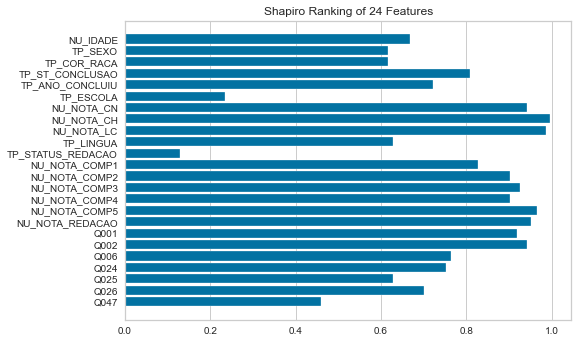

In [81]:
from yellowbrick.features import Rank1D

# modelo importancia de features
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           
visualizer.transform(X)        
visualizer.show()              

In [82]:
treino['TP_STATUS_REDACAO'].value_counts()

1.0    9892
4.0      96
6.0      85
9.0      20
3.0      16
5.0       8
8.0       8
7.0       6
2.0       2
Name: TP_STATUS_REDACAO, dtype: int64

Acima vemos que a TP_STATUS_REDACAO deveria ser arrancada.


Vamos também que as variáveis mais relevantes são as de notas.

In [83]:
correlacionadas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']

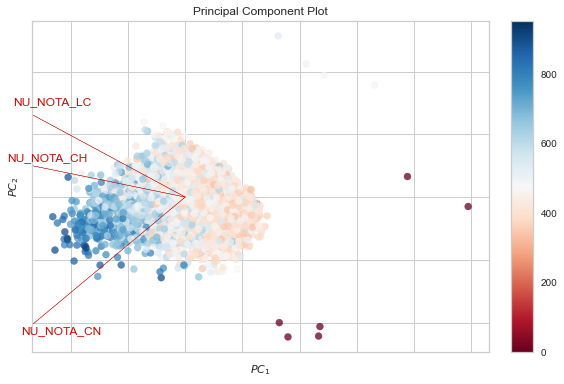

In [84]:
# visualizando PCA
# posso ver em que direção certas variáveis crescem
from yellowbrick.features import PCA as PCA_yllb

visualizer = PCA_yllb(scale=True, proj_features=True, projection=2)
visualizer.fit_transform(X[correlacionadas], y)
visualizer.show()

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


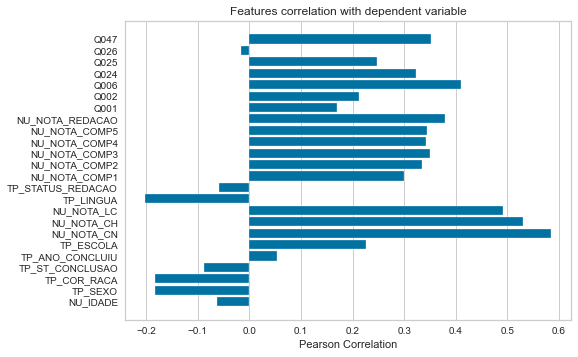

In [85]:
# visualizando correlação
from yellowbrick.target import FeatureCorrelation

features = X.columns.tolist()

visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X, y)        
visualizer.show()       

# Preenchendo valores ausentes

Abaixo vemos que as colunas com valores ausentes são de valores contínuos, logo é aceitável preenche-las com a mediana.

In [86]:
# todas notas ausentes são consideradas ZERO
treino.fillna(0, inplace=True)
teste.fillna(0, inplace=True)

In [87]:
explora = fp.dfExploracao(treino)
explora[explora['na_perct'] != 0].sort_values('colunas')

,colunas,tipos,na_perct,quantUnicos


In [91]:
explora1 = fp.dfExploracao(treino.drop('NU_NOTA_MT',axis=1))
explora2 = fp.dfExploracao(teste)
col1 = explora1[explora1['na_perct'] != 0].sort_values('colunas')
col2 = explora2[explora1['na_perct'] != 0].sort_values('colunas')

(col1['colunas']==col2['colunas']).all()

True

In [92]:
cols_imputar = col1['colunas'].tolist()
cols_imputar

[]

In [93]:
treino_imputado = treino.copy()
input_med = SimpleImputer(strategy='median')

#treino_imputado[cols_imputar] = input_med.fit_transform(treino_imputado[cols_imputar])

Existe valores faltantes no target, não iremos preenche-los mas sim remove-los.

In [94]:
fp.dfExploracao(treino_imputado)

,colunas,tipos,na_perct,quantUnicos
0,NU_IDADE,int64,0.0,55
1,TP_SEXO,int64,0.0,2
2,TP_COR_RACA,int64,0.0,2
3,TP_ST_CONCLUSAO,int64,0.0,4
4,TP_ANO_CONCLUIU,int64,0.0,3
5,TP_ESCOLA,int64,0.0,2
6,NU_NOTA_CN,float64,0.0,2692
7,NU_NOTA_CH,float64,0.0,2978
8,NU_NOTA_LC,float64,0.0,2774
9,TP_LINGUA,int64,0.0,2


In [95]:
print(treino_imputado.shape)
treino_imputado.dropna(inplace=True)
print(treino_imputado.shape)

(13730, 25)
(13730, 25)


In [96]:
treino_imputado.head()

,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,NU_NOTA_MT
0,24,0,0,1,2,0,436.3,495.4,581.2,1,...,80.0,520.0,3,3,2,0,0,2,0,399.4
1,17,1,1,2,1,0,474.5,544.1,599.0,1,...,80.0,580.0,0,0,1,0,0,0,0,459.8
2,21,1,1,3,1,0,0.0,0.0,0.0,1,...,0.0,0.0,3,3,2,0,0,0,0,0.0
3,25,1,0,1,3,0,0.0,0.0,0.0,0,...,0.0,0.0,7,4,4,2,1,2,3,0.0
4,28,0,1,1,2,0,0.0,0.0,0.0,1,...,0.0,0.0,4,3,2,0,0,1,0,0.0


# Treinando o modelo

In [97]:
# metricas de avalizacao
def metricas(y_pred, y_test):
    print('Erro médio absoluto = ',mean_absolute_error(y_pred, y_test).round(3))
    print('Erro médio quadratico = ',mean_squared_error(y_pred, y_test).round(3))
    print('R2 = ',r2_score(y_pred, y_test).round(3))

In [98]:
# setando semente
np.random.seed(42)

In [99]:
X = treino_imputado.drop('NU_NOTA_MT', axis=1)
y = treino_imputado['NU_NOTA_MT']

In [100]:
# conjunto de treino e teste
# 80% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [101]:
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

y_pred = reg_lin.predict(X_test)

metricas(y_pred,y_test)

Erro médio absoluto =  50.233
Erro médio quadratico =  4749.871
R2 =  0.904


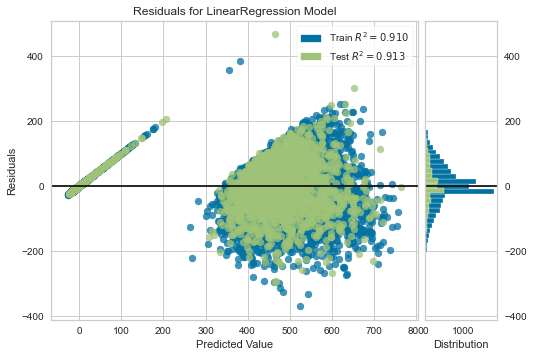

In [102]:
from yellowbrick.regressor import ResidualsPlot
model = reg_lin
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    

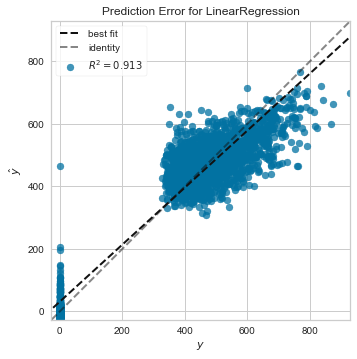

In [103]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83408.18992084265, tolerance: 57610.367385667065
  tol, rng, random, positive)
c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130357.21384225786, tolerance: 57610.367385667065
  tol, rng, random, positive)
c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82606.64607597142, tolerance: 57610.367385667065
  tol, rng, random, positive)
c:\users\jardi\appdata\local\programs\python\python37\lib

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154971.60653274506, tolerance: 57425.358173285415
  tol, rng, random, positive)
c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130293.30844604969, tolerance: 57425.358173285415
  tol, rng, random, positive)
c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225979.3421799913, tolerance: 57425.358173285415
  tol, rng, random, positive)
c:\users\jardi\appdata\local\programs\python\python37\li

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131961.73123271018, tolerance: 57796.89458185579
  tol, rng, random, positive)
c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101253.34523705393, tolerance: 57796.89458185579
  tol, rng, random, positive)
c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163437.19413851202, tolerance: 57796.89458185579
  tol, rng, random, positive)
c:\users\jardi\appdata\local\programs\python\python37\lib\

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4966504.335738488, tolerance: 56880.63898940282
  tol, rng, random, positive)
c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7833203.705859572, tolerance: 56880.63898940282
  tol, rng, random, positive)
c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2993899.6680176556, tolerance: 56880.63898940282
  tol, rng, random, positive)
c:\users\jardi\appdata\local\programs\python\python37\lib\si

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16589392.256357267, tolerance: 57871.82579082153
  tol, rng, random, positive)
c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17334837.20713921, tolerance: 57871.82579082153
  tol, rng, random, positive)


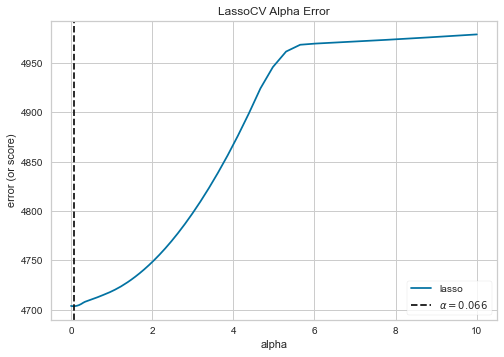

In [104]:
# REgressão regularizada

from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X, y)
visualizer.show()

In [134]:
from sklearn.linear_model import Lasso
reg_lin = Lasso(alpha=0.066)
reg_lin.fit(X_train, y_train)

y_pred = reg_lin.predict(X_test)

metricas(y_pred,y_test)

Erro médio absoluto =  50.204
Erro médio quadratico =  4747.922
R2 =  0.904


## Normalização dos dados

Deve acontecer antes do treinamento, mas aqui vamos usar para comparar resultados com e sem normalização.

In [106]:
from sklearn.preprocessing import RobustScaler

In [107]:
normalizador = RobustScaler()

In [108]:
X_train_norm = normalizador.fit_transform(X_train)
X_test_norm = normalizador.transform(X_test)

In [109]:
reg_lin = LinearRegression()
reg_lin.fit(X_train_norm, y_train)

y_pred = reg_lin.predict(X_test_norm)

metricas(y_pred,y_test)

Erro médio absoluto =  50.233
Erro médio quadratico =  4749.871
R2 =  0.904


Acima vemos que os resultados não mudaram, pois a normalização dos dados servem apenas para acelerar o processo de aprendizado do modelo.

## Seleção de variáveis: busca recursiva

In [110]:
from sklearn.feature_selection import RFE
reg_lin = LinearRegression()

In [111]:
rfe = RFE(reg_lin)
rfe.fit(X_train_norm, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

In [112]:
pd.DataFrame({'coluna':X_train.columns,
              'escolhida': rfe.get_support()})

,coluna,escolhida
0,NU_IDADE,False
1,TP_SEXO,True
2,TP_COR_RACA,False
3,TP_ST_CONCLUSAO,False
4,TP_ANO_CONCLUIU,False
5,TP_ESCOLA,True
6,NU_NOTA_CN,True
7,NU_NOTA_CH,True
8,NU_NOTA_LC,True
9,TP_LINGUA,False


In [113]:
X_train_importante = rfe.transform(X_train_norm)
X_test_importante = rfe.transform(X_test_norm)

In [114]:
reg_lin.fit(X_train_importante, y_train)

y_pred = reg_lin.predict(X_test_importante)

metricas(y_pred,y_test)

Erro médio absoluto =  50.226
Erro médio quadratico =  4744.119
R2 =  0.904


Acima vemos que a seleção de variáveis piorou o modelo.

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


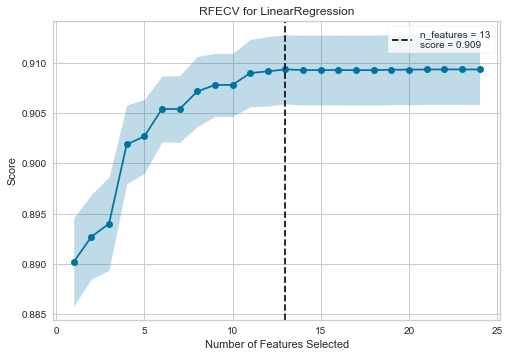

In [115]:
# visualizando selecao de variaveis 
from yellowbrick.model_selection import RFECV

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(reg_lin)

visualizer.fit(X_train_norm, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

## Redução de dimensionalidade: PCA

In [116]:
pca = PCA(.95)
pca.fit(X_train_norm)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [117]:
pca.explained_variance_ratio_.sum()

0.9581766857836944

In [118]:
X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)

In [119]:
reg_lin = LinearRegression()
reg_lin.fit(X_train_pca, y_train)

y_pred = reg_lin.predict(X_test_pca)

metricas(y_pred,y_test)

Erro médio absoluto =  54.644
Erro médio quadratico =  6824.323
R2 =  0.857


In [120]:
reg_lin = LinearRegression()
reg_lin.fit(X_train_norm, y_train)

y_pred = reg_lin.predict(X_test_norm)

metricas(y_pred,y_test)

Erro médio absoluto =  50.233
Erro médio quadratico =  4749.871
R2 =  0.904


## Testando outros modelos

In [121]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor

In [122]:
# criando os modelos
knn_model = KNeighborsRegressor(n_neighbors=5)
svm_model = SVR()
arvoreDec_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
adaBoost_model = AdaBoostRegressor()
xgb_model = XGBRegressor()

# colocando modelos numa lista
modelos = []

modelos.append(('KNN', knn_model))
modelos.append(('SVM', svm_model))
modelos.append(('ArvoreDecisao', arvoreDec_model))
modelos.append(('RF', rf_model))
modelos.append(('AdaBoost', adaBoost_model))
modelos.append(('XGB', xgb_model))

In [123]:
# laço para treina e avaliar os modelos
for nome, modelo in modelos:
    print()
    print('Modelo: ',nome)
    
    # TREINAMENTO
    modelo.fit(X_train_norm, y_train)
    
    # PREDICAO do TESTE
    y_pred = modelo.predict(X_test_norm)
    
    # acurácia (porcentagem de acerto)
    metricas(y_pred=y_pred, y_test=y_test)
    print()



Modelo:  KNN
Erro médio absoluto =  47.637
Erro médio quadratico =  5195.964
R2 =  0.894


Modelo:  SVM
Erro médio absoluto =  61.777
Erro médio quadratico =  8212.143
R2 =  0.791


Modelo:  ArvoreDecisao
Erro médio absoluto =  59.007
Erro médio quadratico =  7857.579
R2 =  0.857


Modelo:  RF
Erro médio absoluto =  42.407
Erro médio quadratico =  3934.974
R2 =  0.923


Modelo:  AdaBoost
Erro médio absoluto =  48.93
Erro médio quadratico =  4760.514
R2 =  0.911


Modelo:  XGB
Erro médio absoluto =  43.056
Erro médio quadratico =  4079.096
R2 =  0.92



# Submetendo resultado

In [124]:
# preenchendo NAN
#teste[cols_imputar] = input_med.transform(teste[cols_imputar])

# normalizando
teste = normalizador.transform(teste)

In [125]:
type(modelos[3][1])

sklearn.ensemble._forest.RandomForestRegressor

In [126]:
# predicao
y_pred = reg_lin.predict(teste)

# RF
#y_pred = modelos[3][1].predict(teste)

In [127]:
type(y_pred)

numpy.ndarray

In [128]:
submeter = pd.concat([id_teste, pd.Series(y_pred)], axis=1)
submeter.columns = ['NU_INSCRICAO','NU_NOTA_MT']

In [129]:
submeter.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,410.522311
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,464.575170
2,b38a03232f43b11c9d0788abaf060f7366053b6d,547.991793
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,2.496838
4,715494628a50142ce8cb17191cfe6d0f3cae0934,561.655902


In [130]:
submeter.to_csv('answer.csv', index=False)

In [131]:
# from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]# Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

In [132]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
# rf_random.fit(X_train_norm, y_train)

In [133]:
# rf_random.best_params_